In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import time
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from shutil import copyfile

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "D:/tmp/cats-and-dogs.zip"

local_zip = 'D:/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('D:/tmp')
zip_ref.close()


In [3]:
print(len(os.listdir('D:/tmp/PetImages/Cat/')))
print(len(os.listdir('D:/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    os.mkdir('D:/tmp/cats-v-dogs')
    os.mkdir('D:/tmp/cats-v-dogs/training')
    os.mkdir('D:/tmp/cats-v-dogs/testing')
    os.mkdir('D:/tmp/cats-v-dogs/training/cats')
    os.mkdir('D:/tmp/cats-v-dogs/training/dogs')
    os.mkdir('D:/tmp/cats-v-dogs/testing/cats')
    os.mkdir('D:/tmp/cats-v-dogs/testing/dogs')
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: 'D:/tmp/cats-v-dogs'


In [6]:
import glob
# Removing files of a directory
files = glob.glob('D:/tmp/cats-v-dogs/testing/cats/*.jpg')
for f in files:
    os.remove(f)
files = glob.glob('D:/tmp/cats-v-dogs/testing/dogs/*.jpg')
for f in files:
    os.remove(f)
files = glob.glob('D:/tmp/cats-v-dogs/training/dogs/*.jpg')
for f in files:
    os.remove(f)
files = glob.glob('D:/tmp/cats-v-dogs/training/cats/*.jpg')
for f in files:
    os.remove(f)

In [7]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    n = len(os.listdir(SOURCE))
    n = int(SPLIT_SIZE * n) + 1
    
    train_path = [os.path.join(SOURCE,path) for path in os.listdir(SOURCE)[:n]]
    test_path = [os.path.join(SOURCE,path) for path in os.listdir(SOURCE)[n:]]
    random.shuffle(train_path)
    random.shuffle(test_path)
    for path in train_path:
        try:
            image.load_img(path)
            copyfile(path, os.path.join(TRAINING, path.split('/')[-1]))
        except:
            if path.split('/')[-1] == 'Thumbs.db':
                pass
            else:
                print(f'{path.split("/")[-1]} is zero length, so ignoring')
    for path in test_path:
        try:
            image.load_img(path)
            copyfile(path, os.path.join(TESTING, path.split('/')[-1]))
        except:
            if path.split('/')[-1] == 'Thumbs.db':
                pass
            else:
                print(f'{path.split("/")[-1]} is zero length, so ignoring')
    # YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "D:/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "D:/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "D:/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "D:/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "D:/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "D:/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


D:\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [4]:
print(len(os.listdir('D:/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('D:/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('D:/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('D:/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1249
1249


In [25]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
                 tf.keras.layers.Conv2D(16,3,activation='relu',input_shape = (150,150,3)),
                 tf.keras.layers.MaxPool2D(2,2),
                 tf.keras.layers.Conv2D(32,3,activation='relu'),
                 tf.keras.layers.MaxPool2D(2,2),
                 tf.keras.layers.Conv2D(64,3,activation='relu'),
                 tf.keras.layers.MaxPool2D(2,2),
                 tf.keras.layers.Flatten(),
                 tf.keras.layers.Dense(512,activation = 'relu'),
                 tf.keras.layers.Dense(128,activation = 'relu'),
                 tf.keras.layers.Dense(1,activation = 'sigmoid'),
])
print(model.summary())
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [26]:
TRAINING_DIR = 'D:/tmp/cats-v-dogs/training'
train_datagen = IDG(
                    rescale = 1/255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest'
                    )
train_generator = train_datagen.flow_from_directory(
                                TRAINING_DIR,
                                target_size = (150,150),
                                batch_size = 128,
                                class_mode = 'binary'
                    )

VALIDATION_DIR = 'D:/tmp/cats-v-dogs/testing'
validation_datagen = IDG(
                        rescale = 1/255,
                        rotation_range = 40,
                        width_shift_range = 0.2,
                        height_shift_range = 0.2,
                        shear_range = 0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True,
                        fill_mode = 'nearest'
                        )
validation_generator = validation_datagen.flow_from_directory(
                                    VALIDATION_DIR,
                                    target_size = (150,150),
                                    batch_size = 32,
                                    class_mode = 'binary'
                        )
# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [27]:
t = time.process_time()
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              steps_per_epoch = 88,
                              validation_steps = 78,
                              validation_data=validation_generator)
elapsed_time = time.process_time() - t
# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
88/88 [==============================] - 81s 909ms/step - loss: 0.7442 - accuracy: 0.5403 - val_loss: 0.6725 - val_accuracy: 0.6146
Epoch 2/15
88/88 [==============================] - 81s 915ms/step - loss: 0.6695 - accuracy: 0.6091 - val_loss: 0.6174 - val_accuracy: 0.6795
Epoch 3/15
88/88 [==============================] - 83s 946ms/step - loss: 0.6479 - accuracy: 0.6460 - val_loss: 0.6089 - val_accuracy: 0.6915
Epoch 4/15
88/88 [==============================] - 84s 959ms/step - loss: 0.6167 - accuracy: 0.6590 - val_loss: 0.6048 - val_accuracy: 0.6518
Epoch 5/15
88/88 [==============================] - 81s 916ms/step - loss: 0.6006 - accuracy: 0.6748 - val_loss: 0.5765 - val_accuracy: 0.7047
Epoch 6/15
88/88 [==============================] - 85s 966ms/step - loss: 0.5777 - accuracy: 0.6960 - val_loss: 0.5910 - val_accuracy: 0.6731
Epoch 7/15
88/88 [==============================] - 101s 1s/step - loss: 0.5694 - accuracy: 0.7007 - val_loss: 0.5446 - val_accuracy: 0.7155
E

In [28]:
print(f'Time Taken for training: {elapsed_time} sec')

Time Taken for training: 1376.71875 sec


Text(0.5, 1.0, 'Training and validation loss')

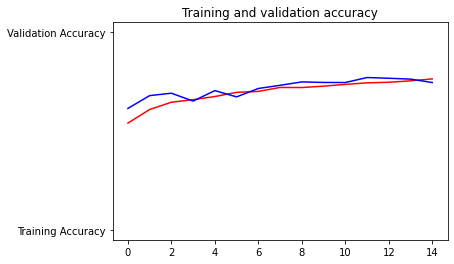

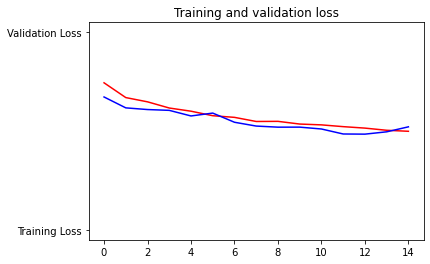

In [29]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")